# Project Idea
Stine Fohrmann

## Climate Index: Heat wave days around Oslo

- Definition: number of days more than 5°C warmer than daily averages from 1940-1969
    - I would like to take into account how many consecutive days are abnormally warm, but I was not yet able to calculate this.
- Region: Southeast of Norway/around Oslo (58-63°N, 9-13°E)
    - I could also focus on a larger region if this is too small.
- Season: JJA/summer
    - For now I computed abnormally warm days during the whole year, but I would like to focus on summer heat waves.
- Lead time: 3 months

![](plots/homework1-climatology.png)
![](plots/homework1-timeseries.png)

## Code to produce the plots above

In [1]:
# Imports
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import netCDF4

In [2]:
# Read data from file
filepath = 'data/ERA5_T2m_1940-2025.nc'
data = xr.open_dataset(filepath)

temp_data = data.variables['var167']
lat_data  = data.variables['lat'][:]
lon_data  = data.variables['lon'][:]
time_data = data.variables['time'][:]

In [3]:
# Define time frame for reference climatology
start_date = '1940-01-01'   # inclusive
end_date   = '1969-12-31'   # inclusive

# Define area
lat_min, lat_max = 58, 63    # north‑south limits
lon_min, lon_max = 9, 13    # west‑east limits

# Select data subset for computing reference climatology
normal_subset = data.sel(time=slice(start_date, end_date), lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max)) - 273.15

# Compute grid average temperature on each day
daily_means = normal_subset.mean(dim=('lat', 'lon'))

# Compute average temperature for each day of the year
climatology = daily_means.groupby('time.dayofyear').mean('time')

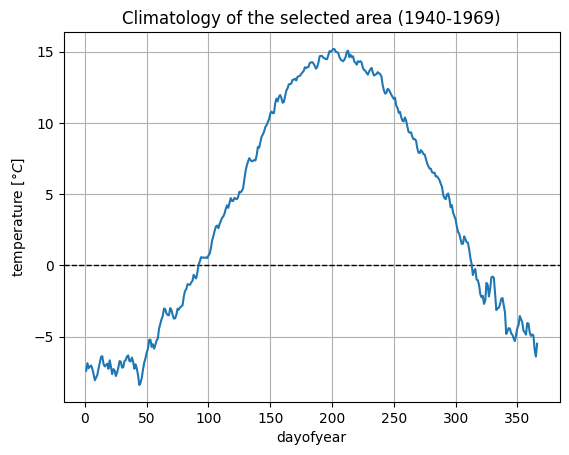

In [4]:
# Plot climatology based on 1940-1969
plt.axhline(y=0, color='black', ls='dashed', lw=1)
climatology.var167.plot.line(x="dayofyear")
plt.title('Climatology of the selected area (1940-1969)')
plt.ylabel(r'temperature [°$C$]')
plt.grid()
plt.savefig('plots/homework1-climatology.png')
plt.show()

In [5]:
# Compute daily means for the remaining years
yearly_anomalies = []
years = []

for year in range(2025-1970):
    year = year + 1970
    years.append(year)
    
    # Define time frame
    start_date = f'{year}-01-01'   # inclusive
    end_date   = f'{year}-12-31'   # inclusive

    # Select data subset of the selected area and after the reference time frame
    subset = data.sel(time=slice(start_date, end_date), lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max)) - 273.15

    # Compute grid average temperature on each day
    daily_means = subset.mean(dim=('lat', 'lon'))

    # Change time to day of year
    daily_means = daily_means.groupby('time.dayofyear').mean('time')

    # Compute temperature anomaly
    anomaly = daily_means - climatology

    # Check whether above +5C threshold
    above_thr = anomaly >= 5
    num_anomalies = above_thr['var167'].sum().item()
    yearly_anomalies.append(num_anomalies)

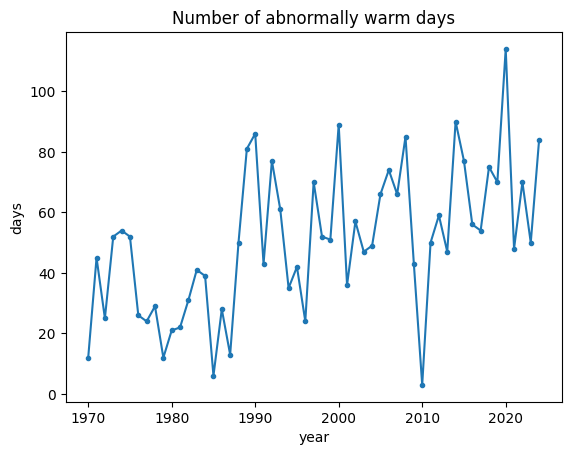

In [6]:
# Plot anomaly
plt.plot(years, yearly_anomalies, '.-')
plt.title('Number of abnormally warm days')
plt.ylabel(r'days')
plt.xlabel(r'year')
plt.savefig('plots/homework1-timeseries.png')
plt.show()